In [18]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('seaborn-whitegrid')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import time
import gc

In [19]:
# read the cleaned data from last workshop
start_time = time.time()
df = pd.read_csv('/Users/Subbalakshmi/Documents/DataVizPython/dsc_utrgv/data-cleaning-with-pandas-fall-2020/COVID_complete.csv', engine='python') 

#Estimates time taken for the action
print('Time taken:'+str((time.time() - start_time))+' seconds')  
del start_time

Time taken:0.01624774932861328 seconds


In [ ]:
df
# print(df.index) #Print all indexes in the df
# print(len(df.columns))
df.info()
# df.dtypes

In [ ]:
df.head()


In [ ]:

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

In [ ]:

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

<AxesSubplot:>

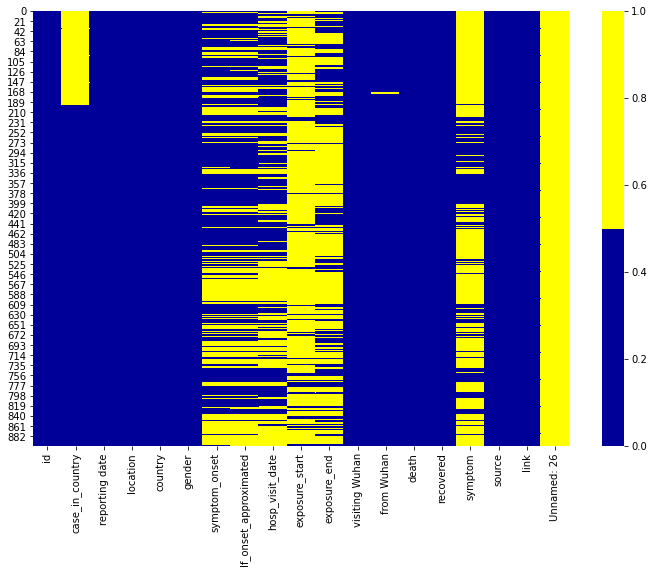

In [20]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [21]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
case_in_country - 22%
reporting date - 0%
location - 0%
country - 0%
gender - 0%
symptom_onset - 38%
If_onset_approximated - 38%
hosp_visit_date - 44%
exposure_start - 87%
exposure_end - 65%
visiting Wuhan - 0%
from Wuhan - 0%
death - 0%
recovered - 0%
symptom - 70%
source - 0%
link - 0%
Unnamed: 26 - 100%


created missing indicator for: case_in_country
created missing indicator for: symptom_onset
created missing indicator for: If_onset_approximated
created missing indicator for: hosp_visit_date
created missing indicator for: exposure_start
created missing indicator for: exposure_end
created missing indicator for: from Wuhan
created missing indicator for: symptom
created missing indicator for: Unnamed: 26


<AxesSubplot:xlabel='index'>

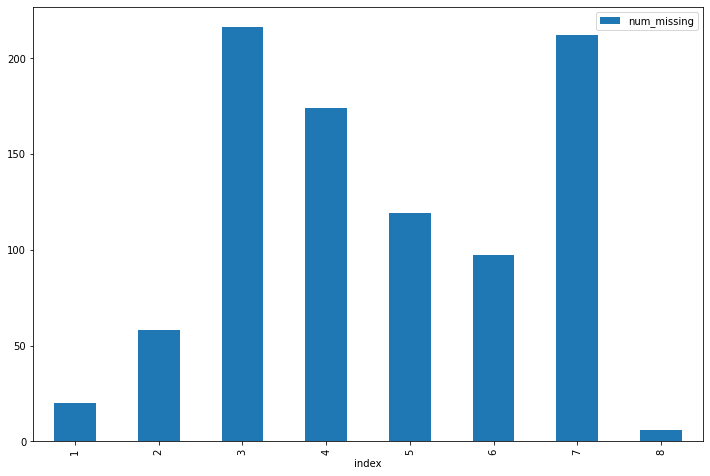

In [22]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

<AxesSubplot:>

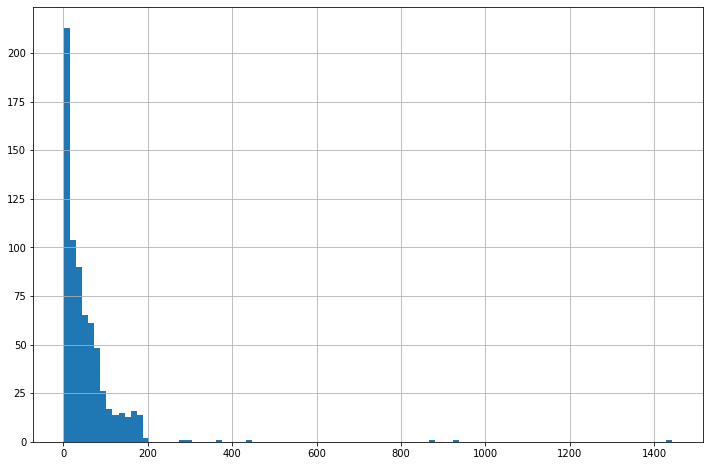

In [23]:
# histogram of a particular feature 'duration'.
df['case_in_country'].hist(bins=100)

<AxesSubplot:>

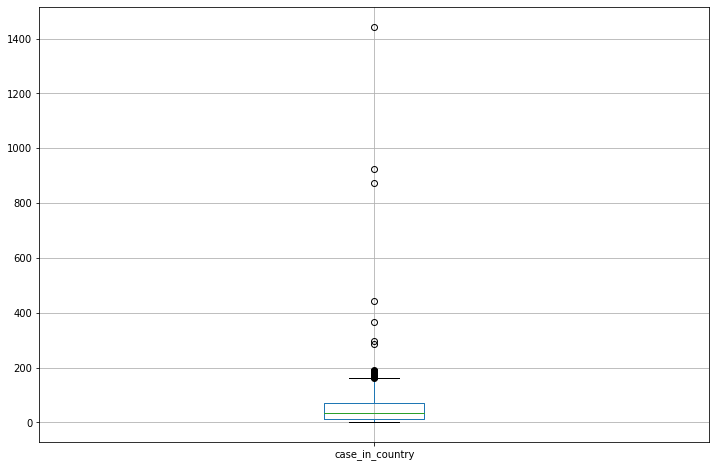

In [24]:
# box plot.
df.boxplot(column=['case_in_country'])

In [ ]:
df['case_in_country'].describe()